In [1]:
# !pip install pyLDAvis
# !pip install apyori

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from konlpy.tag import Okt
import re
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# 데이터 불러오기
data_2016 = pd.read_csv('Competitiveness_adv_2016.csv',index_col=0)
data_2017 = pd.read_csv('Competitiveness_adv_2017.csv',index_col=0)
data_2018 = pd.read_csv('Competitiveness_adv_2018.csv',index_col=0)
data_2019 = pd.read_csv('Competitiveness_adv_2019.csv',index_col=0)
data_2020 = pd.read_csv('Competitiveness_adv_2020.csv',index_col=0)

In [4]:
# 기사 내용없는 데이터 제거
data_2016 = data_2016.dropna(axis=0)
data_2017 = data_2017.dropna(axis=0)
data_2018 = data_2018.dropna(axis=0)
data_2019 = data_2019.dropna(axis=0)
data_2020 = data_2020.dropna(axis=0)

# 방법 1 sklearn LDA 이용

In [5]:
# 명사 추출
def tokenizer(text) :
    okt = Okt()
    text_nouns = okt.nouns(text)
    norm = [word for word in text_nouns if len(word) > 1]
    return norm

In [6]:
# 토픽모델링 모델 생성
vectorizer = TfidfVectorizer(tokenizer=tokenizer)
topic_2016 = vectorizer.fit_transform(data_2016['text'])
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=777,max_iter=1)
lda_top=lda_model.fit_transform(topic_2016)
terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

In [7]:
# 토픽 추출
def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lda_model.components_,terms)

Topic 1: [('투자', 0.77), ('포스코건설', 0.67), ('파크원', 0.63), ('펀드', 0.6), ('증권', 0.53)]
Topic 2: [('다이아몬드', 1.67), ('교육', 0.84), ('중국', 0.83), ('필로', 0.7), ('시스', 0.66)]
Topic 3: [('서비스', 1.09), ('지능', 1.08), ('기업', 1.07), ('데이터', 1.07), ('아마존', 1.02)]
Topic 4: [('신세계', 0.87), ('백화점', 0.68), ('자본', 0.63), ('증권', 0.62), ('면세점', 0.6)]
Topic 5: [('비주류', 0.64), ('자본', 0.6), ('엔지니어링', 0.6), ('구글', 0.59), ('탈당', 0.56)]
Topic 6: [('중국', 1.33), ('판매', 0.71), ('당선인', 0.7), ('트럼프', 0.68), ('미국', 0.66)]
Topic 7: [('치료', 2.83), ('스틸', 2.82), ('낸드', 2.71), ('케미칼', 2.66), ('혈우병', 2.64)]
Topic 8: [('기업', 32.73), ('산업', 31.99), ('전자', 31.0), ('기술', 30.86), ('제품', 30.51)]
Topic 9: [('부산', 0.69), ('한중', 0.65), ('김영복', 0.6), ('전선', 0.6), ('특허', 0.58)]
Topic 10: [('게임', 0.78), ('증권', 0.57), ('자본', 0.55), ('전투기', 0.51), ('유상증자', 0.51)]


In [ ]:
# 토픽 모델링 시각화 json graph
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, topic_2016, vectorizer)

# 방법2 gensim 이용

In [9]:
# 텍스트 전처리
lst_2016 = []
for text in data_2016['text']:
    okt = Okt()
    text_nouns = okt.nouns(text)
    nouns_2 = [word for word in text_nouns if len(word) > 1]
    lst_2016.append(nouns_2)

In [10]:
# 토픽모델링 모델 생성
import gensim

dictionary = gensim.corpora.Dictionary(lst_2016)
corpus = [dictionary.doc2bow(text) for text in lst_2016]

C:\ProgramData\Anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [11]:
# 토픽 추출
import gensim
NUM_TOPICS = 10 
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15,minimum_probability=0)
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.019*"전자" + 0.017*"기술" + 0.013*"자동차" + 0.012*"시장" + 0.008*"업체"')
(1, '0.011*"사업" + 0.009*"제품" + 0.006*"생산" + 0.006*"위해" + 0.006*"교육"')
(2, '0.016*"수출" + 0.012*"기업" + 0.009*"한국" + 0.007*"시장" + 0.006*"경제"')
(3, '0.012*"기업" + 0.011*"서비스" + 0.007*"고객" + 0.006*"시장" + 0.005*"게임"')
(4, '0.018*"산업" + 0.015*"경쟁력" + 0.012*"정부" + 0.008*"강화" + 0.008*"사업"')
(5, '0.014*"시장" + 0.012*"중국" + 0.008*"생산" + 0.007*"수주" + 0.007*"공장"')
(6, '0.014*"중국" + 0.011*"기술" + 0.009*"시장" + 0.008*"산업" + 0.008*"기업"')
(7, '0.008*"제품" + 0.007*"가격" + 0.006*"시장" + 0.006*"상품" + 0.005*"카페"')
(8, '0.011*"방송" + 0.008*"사업" + 0.006*"클린턴" + 0.006*"헬로비전" + 0.006*"트럼프"')
(9, '0.010*"산업" + 0.008*"기업" + 0.008*"구글" + 0.007*"사업" + 0.006*"시장"')


In [12]:
# 시각화
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary=ldamodel.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.013657  0.031283       1        1  21.836651
4      0.061500 -0.149438       2        1  11.573122
2      0.028512  0.039120       3        1  11.524963
0     -0.084089 -0.078378       4        1  10.068625
1     -0.033274 -0.022672       5        1   9.512510
5     -0.005887 -0.039523       6        1   8.425794
8      0.167629  0.052874       7        1   8.086659
6     -0.026430 -0.007600       8        1   7.952209
9      0.014767  0.087819       9        1   7.150716
7     -0.109071  0.086516      10        1   3.868747, topic_info=     Term         Freq        Total Category  logprob  loglift
1403   전자  1289.000000  1289.000000  Default  30.0000  30.0000
996    수출  1060.000000  1060.000000  Default  29.0000  29.0000
172    중국  1612.000000  1612.000000  Default  28.0000  28.0000
878    산업  2132.000000  2132.000000  Default  27.0000  27.0000
741    방송   382.000000   382.000000  Default  26.0000  26.0000
...   ...          ...          ...      ...      ...      ...
76     무단    44.667225  1198.032593  Topic10  -5.8842  -0.0370
328    고객    44.068474  1022.950684  Topic10  -5.8977   0.1075
1112   업체    45.268467  1454.782349  Topic10  -5.8709  -0.2178
25     금지    44.556034  1201.905640  Topic10  -5.8867  -0.0427
85     배포    44.365494  1169.346558  Topic10  -5.8910  -0.0195

[816 rows x 6 columns], token_table=       Topic      Freq Term
term                       
223        1  0.196503   가격
223        2  0.124678   가격
223        3  0.174820   가격
223        4  0.150426   가격
223        5  0.048787   가격
...      ...       ...  ...
2169       8  0.054131   후보
10819      2  0.975308   후판
2923       5  0.969095  훈련기
10036      3  0.061262  힐러리
10036      7  0.918934  힐러리

[2690 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 3, 1, 2, 6, 9, 7, 10, 8])

# 의미 연결망 분석(단어 네트워크)

In [13]:
# 토픽별 상위 단어 30개 추출
top_30 = ldamodel.show_topics(num_topics=10, num_words=30, log=False, formatted=True)

In [14]:
# 단어를 리스트 형식으로 변환
t2l = []
for text in top_30:
    words = list(text)
    t2l.append(words)

In [15]:
# 단어들만 따로 추출
word = []
for text in t2l:
    regex = re.compile('[가-힣]+').findall(str(text))
    word.append(regex)

In [17]:
from apyori import apriori

In [18]:
# 연관분석
result = (list(apriori(word,min_support=0.4)))
df = pd.DataFrame(result)
# 지지도를 낮게하면 연산이 오래걸림

In [19]:
df['length'] = df['items'].apply(lambda x: len(x))

In [20]:
df=df[(df['length']==2)].sort_values(by='support',ascending=False)

In [21]:
# 연관분석 결과
df

,items,support,ordered_statistics,length
93,"(시장, 기자)",1.0,"[((), (시장, 기자), 1.0, 1.0), ((기자), (시장), 1.0, 1...",2
72,"(기술, 시장)",0.9,"[((), (기술, 시장), 0.9, 1.0), ((기술), (시장), 1.0, 1...",2
42,"(경쟁, 시장)",0.9,"[((), (경쟁, 시장), 0.9, 1.0), ((경쟁), (시장), 1.0, 1...",2
66,"(기술, 기자)",0.9,"[((), (기술, 기자), 0.9, 1.0), ((기술), (기자), 1.0, 1...",2
37,"(경쟁, 기자)",0.9,"[((), (경쟁, 기자), 0.9, 1.0), ((경쟁), (기자), 1.0, 1...",2
...,...,...,...,...
70,"(기술, 성장)",0.4,"[((), (기술, 성장), 0.4, 1.0), ((기술), (성장), 0.4444...",2
69,"(산업, 기술)",0.4,"[((), (산업, 기술), 0.4, 1.0), ((기술), (산업), 0.4444...",2
64,"(글로벌, 시장)",0.4,"[((), (글로벌, 시장), 0.4, 1.0), ((글로벌), (시장), 1.0,...",2
63,"(사업, 글로벌)",0.4,"[((), (사업, 글로벌), 0.4, 1.0), ((글로벌), (사업), 1.0,...",2


In [22]:
import networkx as nx
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [23]:
# 네트워크 생성
G = nx.Graph()
ar = (df['items'])
G.add_edges_from(ar)

In [24]:
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000*(nsize - min(nsize))/(max(nsize)-min(nsize))

In [25]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts/H2GTRE.ttf").get_name()
rc('font', family=font_name)

<>:2: DeprecationWarning: invalid escape sequence \W
<>:2: DeprecationWarning: invalid escape sequence \W
<>:2: DeprecationWarning: invalid escape sequence \W
<ipython-input-25-aba868ac5698>:2: DeprecationWarning: invalid escape sequence \W
  font_name = font_manager.FontProperties(fname="C:\Windows\Fonts/H2GTRE.ttf").get_name()


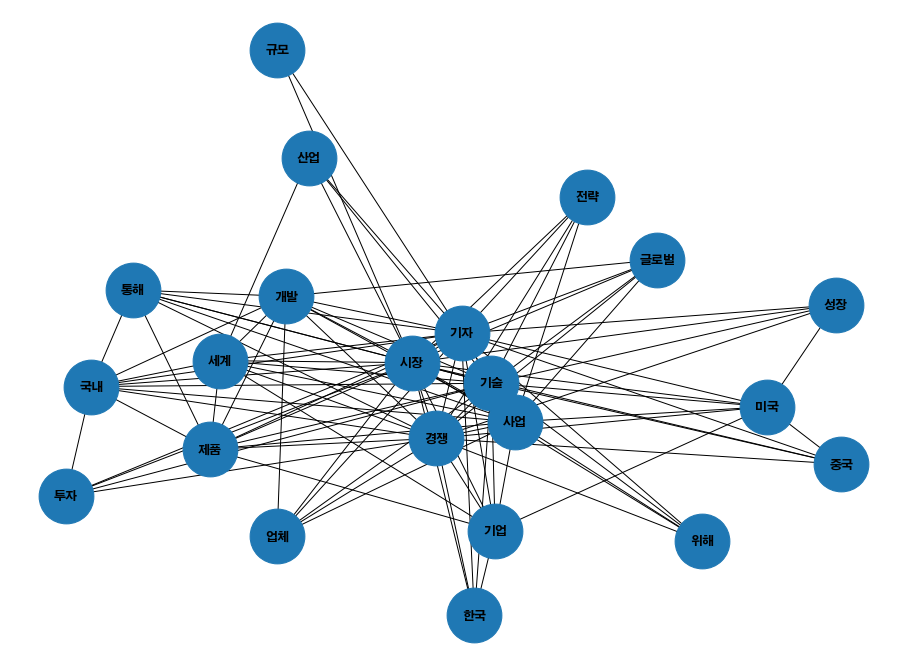

In [26]:
# 시각화
plt.figure(figsize(16,12))
plt.axis('off')
nx.draw_networkx(G,font_family=font_name,node_size=3000)

# t-sne분석

In [39]:
# 모델 생성
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [41]:
# 시각화
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
import matplotlib.colors as mcolors

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1461 samples in 0.003s...
[t-SNE] Computed neighbors for 1461 samples in 0.038s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1461
[t-SNE] Computed conditional probabilities for sample 1461 / 1461
[t-SNE] Mean sigma: 0.062178
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.542892
[t-SNE] KL divergence after 1000 iterations: 0.562419


Loading BokehJS ...

# 년도별

In [94]:
vectorizer = TfidfVectorizer(tokenizer=tokenizer)
topic_2017 = vectorizer.fit_transform(data_2017['text'])
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=777,max_iter=1)
lda_top=lda_model.fit_transform(topic_2017)
terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lda_model.components_,terms)

Topic 1: [('중공업', 0.73), ('아마존', 0.55), ('인수합병', 0.54), ('관광', 0.53), ('조선', 0.52)]
Topic 2: [('기술', 17.18), ('바이오', 13.61), ('배터리', 12.09), ('솔루션', 11.02), ('공장', 10.05)]
Topic 3: [('브랜드', 0.75), ('호날두', 0.5), ('아파트', 0.48), ('보험', 0.48), ('병원', 0.47)]
Topic 4: [('벤처기업', 1.86), ('고객', 0.89), ('원전', 0.85), ('만족도', 0.83), ('쇼핑', 0.75)]
Topic 5: [('중공업', 1.47), ('햇반', 0.99), ('위스키', 0.98), ('벤처기업', 0.82), ('골든', 0.82)]
Topic 6: [('공항', 1.09), ('항공', 0.64), ('북한', 0.61), ('항공사', 0.6), ('미국', 0.59)]
Topic 7: [('중공업', 1.06), ('비트코인', 0.73), ('리튬', 0.61), ('투자', 0.58), ('유상증자', 0.57)]
Topic 8: [('의견', 8.06), ('제시', 4.42), ('매수', 4.05), ('종목', 3.99), ('목표', 3.56)]
Topic 9: [('진에어', 2.17), ('상장', 1.2), ('중공업', 1.11), ('공모', 0.96), ('기록', 0.82)]
Topic 10: [('중국', 20.7), ('시장', 20.44), ('기업', 20.4), ('사업', 20.07), ('투자', 18.14)]


In [95]:
vectorizer = TfidfVectorizer(tokenizer=tokenizer)
topic_2018 = vectorizer.fit_transform(data_2018['text'])
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=777,max_iter=1)
lda_top=lda_model.fit_transform(topic_2018)
terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lda_model.components_,terms)

Topic 1: [('의견', 9.23), ('제시', 5.1), ('종목', 4.6), ('목표', 3.88), ('주가', 3.83)]
Topic 2: [('경영', 1.06), ('치킨', 1.01), ('사장', 0.99), ('회장', 0.98), ('기업', 0.98)]
Topic 3: [('돼지', 0.92), ('베리', 0.81), ('대법관', 0.79), ('위스키', 0.67), ('철강', 0.67)]
Topic 4: [('고객', 1.15), ('만족도', 0.92), ('페이스북', 0.84), ('쇼핑', 0.84), ('콘텐츠', 0.74)]
Topic 5: [('홈런', 0.86), ('중공업', 0.66), ('한컴', 0.63), ('만루', 0.63), ('수소', 0.61)]
Topic 6: [('기업', 27.21), ('기술', 24.24), ('중국', 22.66), ('사업', 21.79), ('매출', 20.41)]
Topic 7: [('러시아', 0.76), ('배터리', 0.69), ('수소', 0.61), ('일본', 0.61), ('아프리카', 0.6)]
Topic 8: [('김포', 0.9), ('기술', 0.63), ('임원', 0.61), ('상공회의소', 0.58), ('성금', 0.54)]
Topic 9: [('알루미늄', 2.49), ('광양', 1.92), ('중국', 1.78), ('국내', 1.34), ('미국', 1.25)]
Topic 10: [('대법관', 3.85), ('검찰', 2.24), ('대법원', 1.87), ('금융', 1.74), ('전기차', 1.62)]


In [96]:
vectorizer = TfidfVectorizer(tokenizer=tokenizer)
topic_2019 = vectorizer.fit_transform(data_2019['text'])
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=777,max_iter=1)
lda_top=lda_model.fit_transform(topic_2019)
terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lda_model.components_,terms)

Topic 1: [('잠수함', 4.93), ('대우조선', 2.45), ('대우건설', 2.3), ('해양', 2.12), ('리츠', 2.07)]
Topic 2: [('수소', 0.67), ('한진', 0.59), ('배송', 0.58), ('새벽', 0.57), ('연구자', 0.52)]
Topic 3: [('음원', 0.74), ('대우건설', 0.7), ('리츠', 0.69), ('헤럴드경제', 0.62), ('하나투어', 0.58)]
Topic 4: [('배송', 0.74), ('리츠', 0.73), ('새벽', 0.64), ('대우건설', 0.64), ('우주', 0.61)]
Topic 5: [('기술', 23.01), ('기업', 22.76), ('중국', 20.85), ('사업', 19.78), ('롯데', 19.28)]
Topic 6: [('민주당', 0.9), ('공천', 0.88), ('의원', 0.8), ('총선', 0.8), ('배송', 0.74)]
Topic 7: [('단지', 1.95), ('분양', 1.78), ('우주', 1.66), ('아파트', 1.53), ('브랜드', 1.52)]
Topic 8: [('전자', 2.59), ('중국', 1.82), ('데이터', 1.53), ('시장', 1.29), ('배터리', 1.28)]
Topic 9: [('수소', 1.71), ('밸리', 0.8), ('상용차', 0.77), ('연료', 0.7), ('사회', 0.69)]
Topic 10: [('부패', 1.17), ('우주', 1.07), ('데이터', 0.93), ('배송', 0.82), ('인증', 0.79)]


In [97]:
vectorizer = TfidfVectorizer(tokenizer=tokenizer)
topic_2020 = vectorizer.fit_transform(data_2020['text'])
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=777,max_iter=1)
lda_top=lda_model.fit_transform(topic_2020)
terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lda_model.components_,terms)

Topic 1: [('금호', 1.64), ('고무', 0.98), ('연구', 0.96), ('소재', 0.95), ('라텍스', 0.93)]
Topic 2: [('라면', 5.29), ('농심', 3.63), ('신라면', 3.11), ('신라면블랙', 2.53), ('스마일게이트', 2.09)]
Topic 3: [('권고', 1.0), ('수출', 0.87), ('산업', 0.87), ('일본', 0.79), ('스마일게이트', 0.79)]
Topic 4: [('배터리', 1.65), ('전기차', 1.31), ('그룹', 1.23), ('강판', 1.11), ('스마일게이트', 1.01)]
Topic 5: [('스마일게이트', 1.04), ('게임', 0.66), ('제조업', 0.66), ('사이다', 0.62), ('바르셀로나', 0.6)]
Topic 6: [('강판', 1.12), ('동국제강', 0.94), ('컬러', 0.9), ('데이터', 0.85), ('부산', 0.81)]
Topic 7: [('사업', 29.04), ('기업', 26.3), ('코로나', 23.25), ('기술', 21.32), ('중국', 19.59)]
Topic 8: [('뿌리', 4.7), ('스마일게이트', 3.55), ('그룹', 2.56), ('산업', 1.98), ('경영', 1.71)]
Topic 9: [('스마일게이트', 0.88), ('토스', 0.67), ('바르셀로나', 0.66), ('마늘', 0.64), ('팩토리', 0.58)]
Topic 10: [('리츠', 0.94), ('펀드', 0.87), ('월마트', 0.64), ('트럭', 0.63), ('주행', 0.6)]
